In [10]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [12]:
demo = pd.read_csv("data/wisc_bc_data.csv")
demo = demo.drop('id',axis=1)
demo.head()
y=demo['diagnosis']
X = demo.drop('diagnosis',axis=1)
dt = DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X,y)
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00802236, 0.00508236,
       0.        , 0.        , 0.01094813, 0.0242563 , 0.        ,
       0.        , 0.0193529 , 0.        , 0.        , 0.        ,
       0.02236082, 0.05690144, 0.68588894, 0.        , 0.04911602,
       0.        , 0.        , 0.10078299, 0.01728774, 0.        ])

In [178]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.05955  ...         13.50          15.64            86.97   
1         0.06491  ...         11.88          22.94            78.28   
2         0.06340  ...         12.41          26.44            79.93   
3         0.06072  ...         11.92          15.77            76.53   
4         0.05544  ...         16.20          15.73           104.50   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       549.1            0.1385             0.1266          0.12420   
1       424.8            0.1213             0.2515          0.19160   
2       471.4            0.1369             0.1482          0.10670   
3       434.0            0.1367             0.1822          0.08669   
4       819.1            0.1126             0.1737          0.13620   

   points_worst  symmetry_worst  dimension_worst  
0       0.09391          0.2827          0.06771  
1       0.07926          0.2940          0.07587  
2       0.07431          0.2998          0.07881  
3       0.08611          0.2102          0.06784  
4       0.08178          0.2487          0.06766  

[5 rows x 30 columns]

In [13]:
from sklearn.linear_model import LogisticRegression
y=demo['diagnosis']
X = demo.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = LogisticRegression()
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))

What is the Testing Accuracy
0.9385964912280702
What is the Training Accuracy
0.9428571428571428


In [14]:
y=demo['diagnosis']
X = demo.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=4)
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

What is the Testing Accuracy
0.956140350877193
What is the Training Accuracy
0.9846153846153847
[[76  1]
 [ 4 33]]
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        77
           M       0.97      0.89      0.93        37

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

[0.95       0.97058824]
[0.98701299 0.89189189]
[0.96815287 0.92957746]


In [26]:
y=demo['diagnosis']
X = demo[['points_worst','perimeter_worst','texture_worst']]
#X = demo.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=8)
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))




What is the Testing Accuracy
0.956140350877193
What is the Training Accuracy
0.9978021978021978


In [16]:
#Build Final Model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
scoresrf = cross_val_score(dt, X_train, y_train, cv=10,scoring='f1_weighted')
print(scoresrf)

[0.95652174 0.91198518 0.88912709 0.91050725 0.95652174 0.95555556
 0.89024874 0.93290803 0.8863374  0.97789322]


Automatically created module for IPython interactive environment


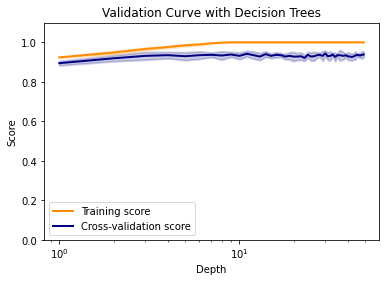

In [28]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Trees")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [27]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
a = np.arange(1,31)
model = DecisionTreeClassifier(criterion='entropy',random_state=1)
grid = GridSearchCV(cv=10,estimator=model, scoring='f1_weighted',param_grid=dict(max_depth=a))
grid.fit(X_train, y_train)
#print(grid)
# summarize the results of the grid search
print(grid.best_estimator_.max_depth)
print(grid.best_params_)
print(grid.best_score_)


8
{'max_depth': 8}
0.9405073948125386


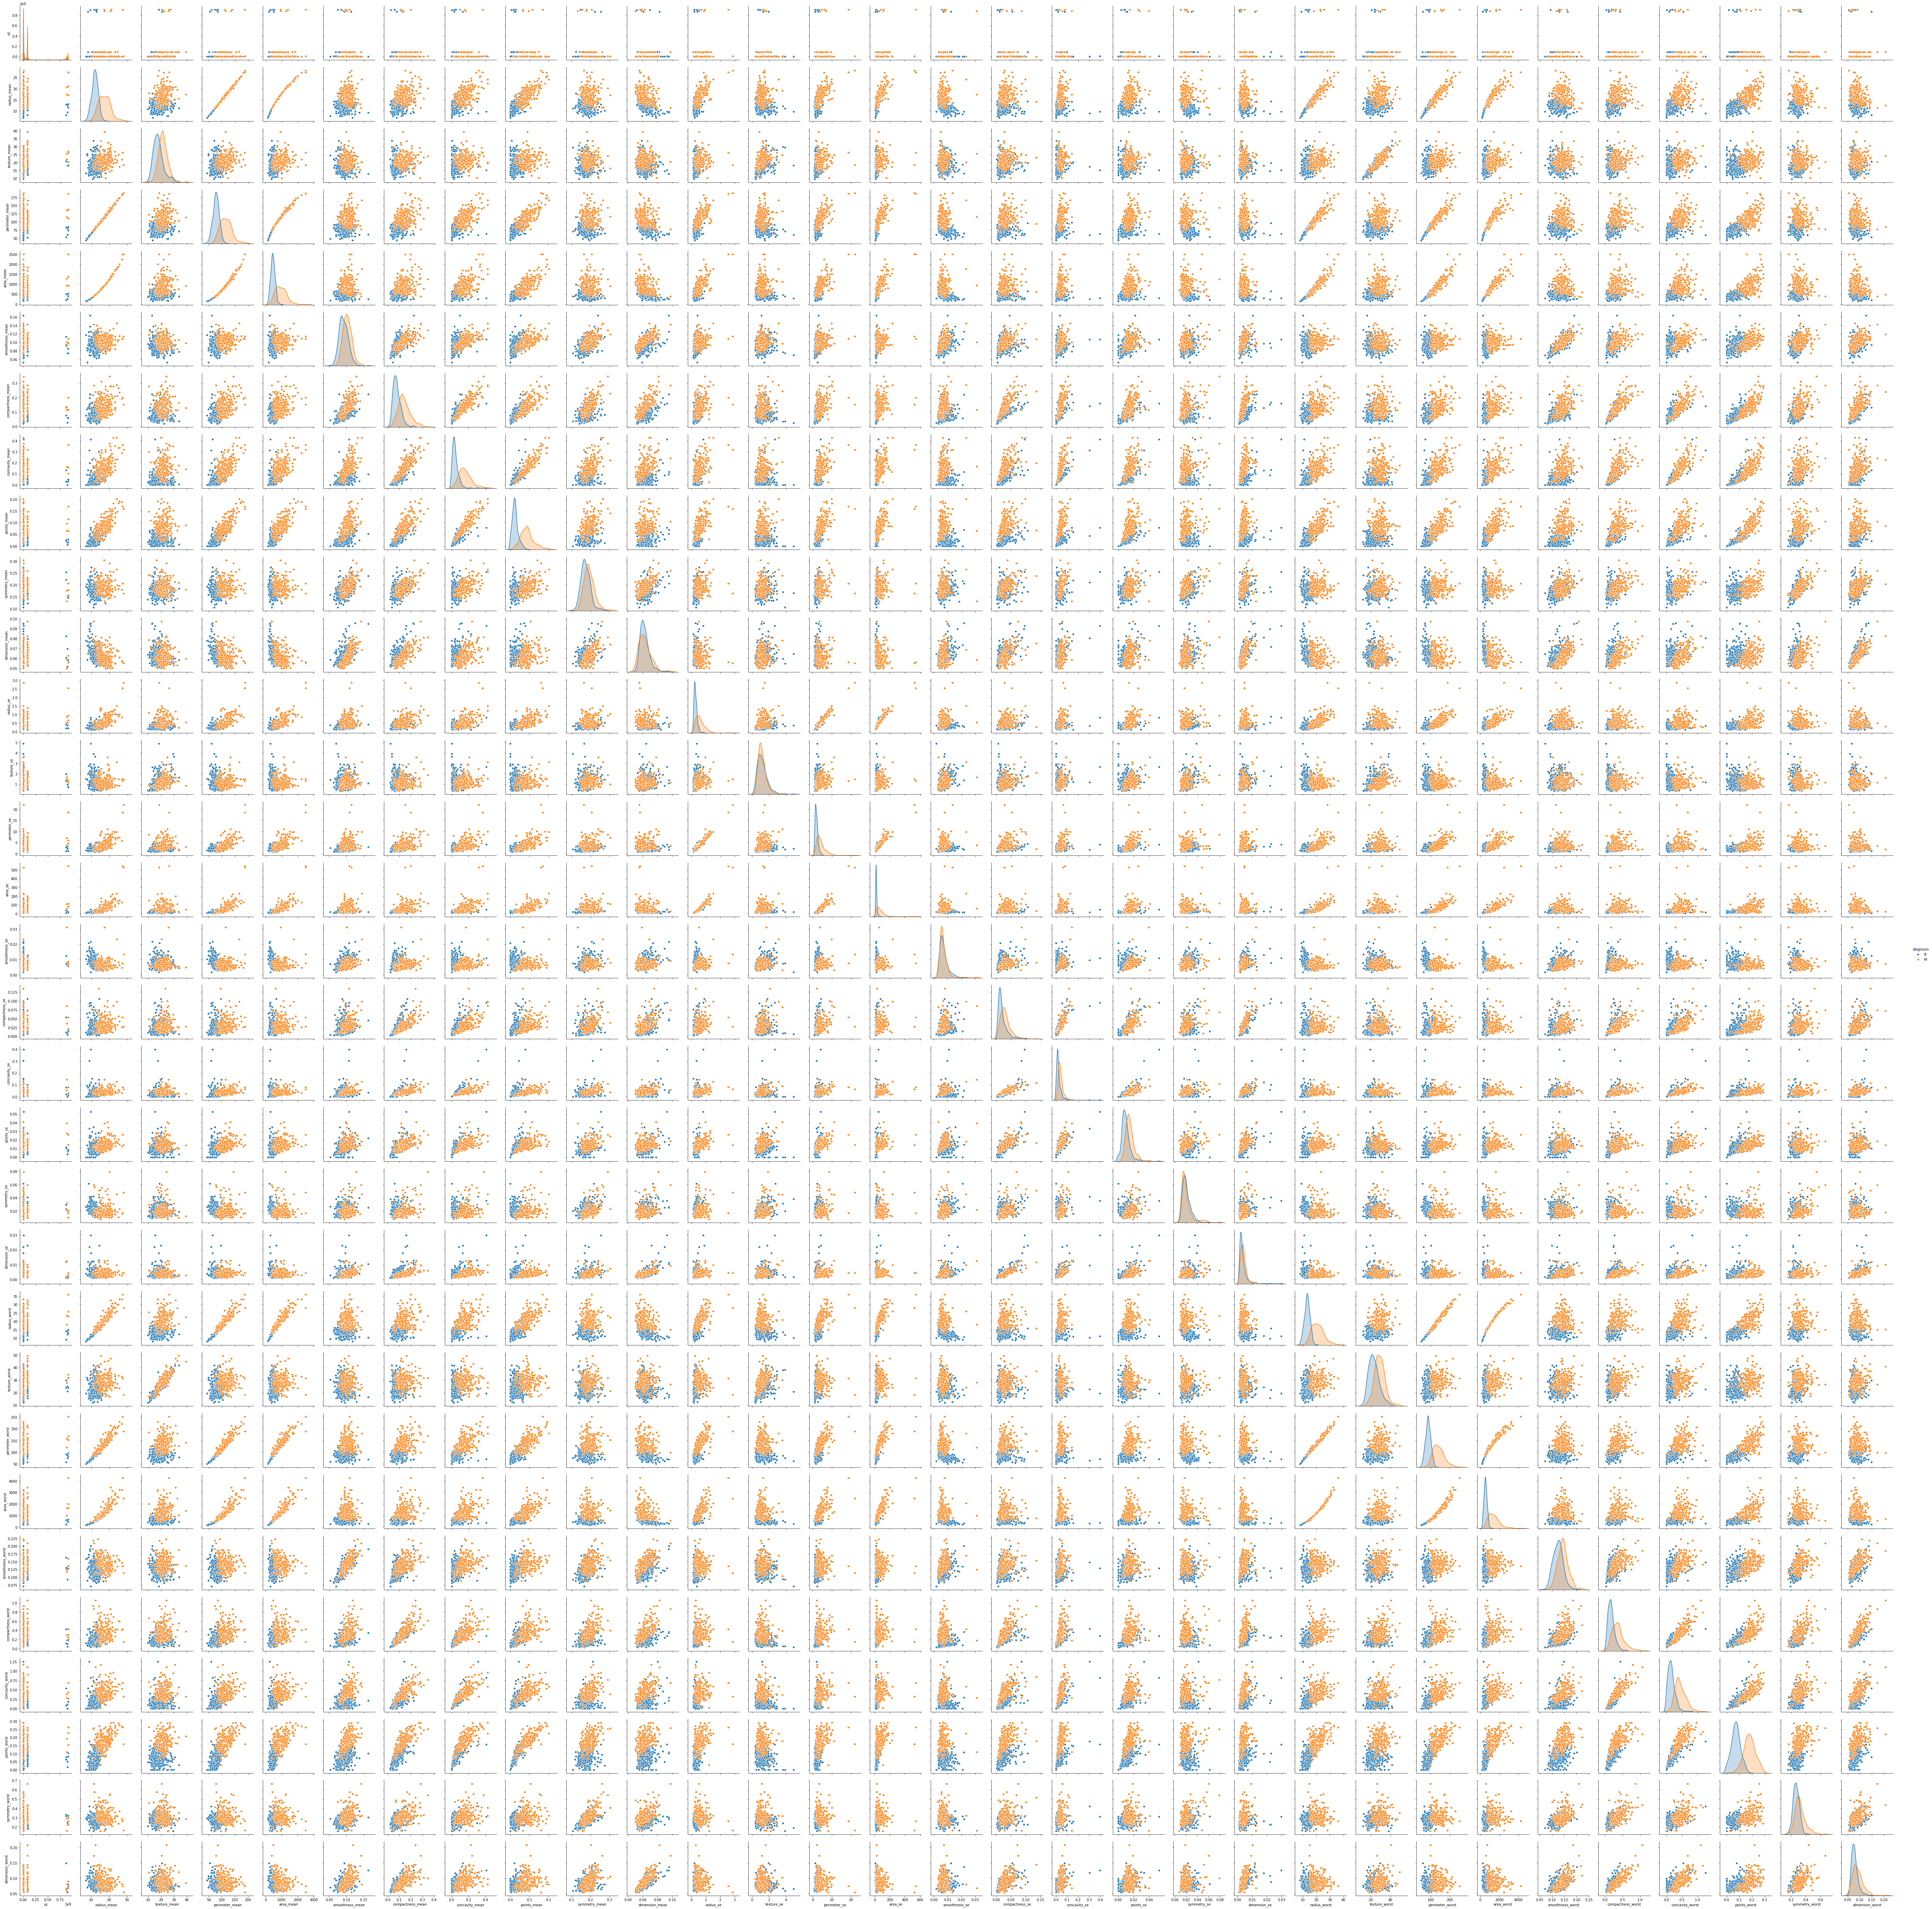

In [53]:
demo = pd.read_csv("wisc_bc_data.csv")
sns.pairplot(demo,hue = 'diagnosis',diag_kind='kde')